<a href="https://colab.research.google.com/github/nephelim74/machinelearn/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Кластеризация. Метод K-Means. Домашнее задание

## Задача

Пусть имеется набор данных `Mall_Customers.csv` о покупателях супермаркета:

* CustomerID — идентификатор покупателя;
* Genre — пол;
* Age — возраст;
* Annual Income (k$) — годовой доход покупателя в тыс. долл.;
* Spending Score (1–100) — рейтинг трат покупателя.

Решите задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы.

### Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других обнаруженных свойствах данных.

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

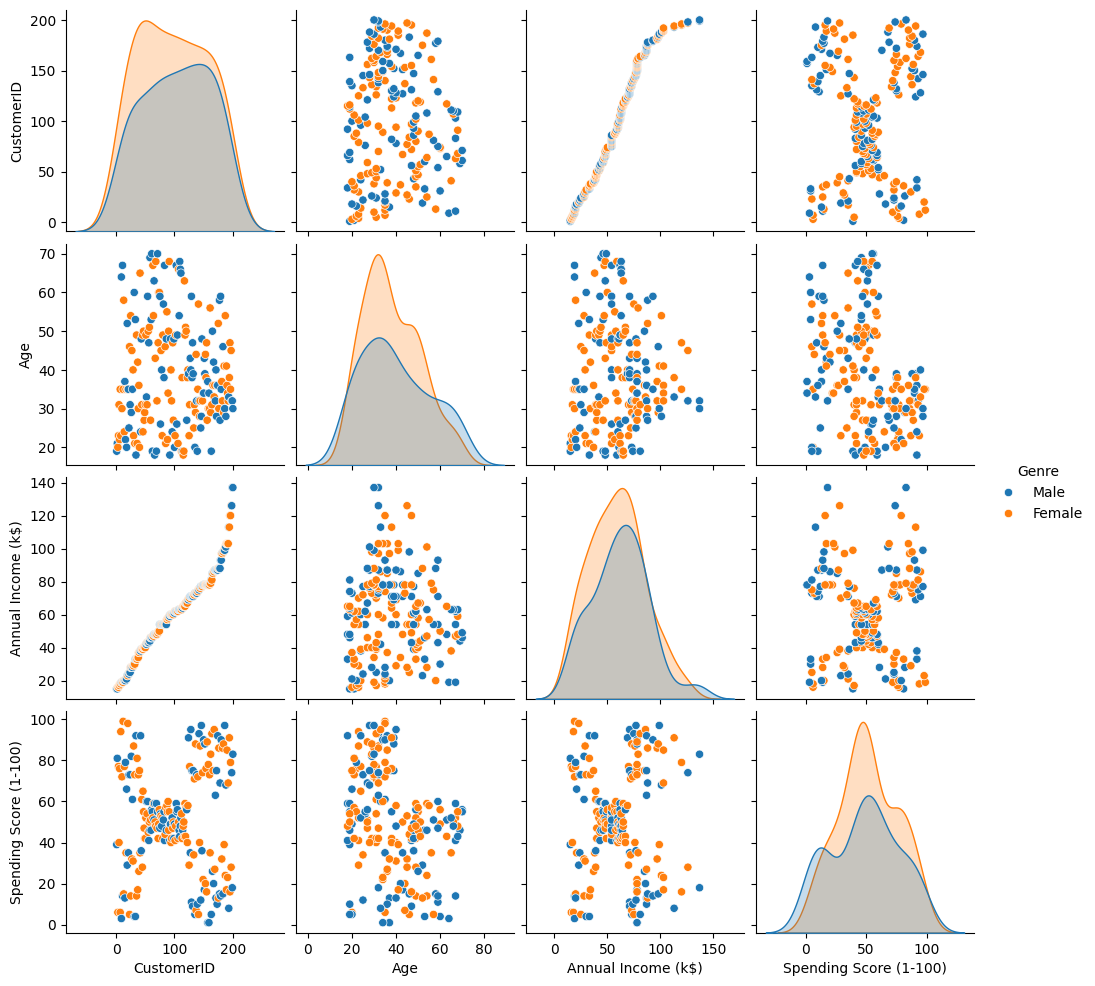

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
url = "https://gbcdn.mrgcdn.ru/uploads/asset/6057167/attachment/df6bf16a749bb5d10894b689ab40dda5.csv"
data = pd.read_csv(url)

# Вывод первых строк данных
print(data.head())

# Основная информация о данных
print(data.info())

# Описательная статистика
print(data.describe())

# Проверка на пропуски
print(data.isnull().sum())

# Визуализация распределений
sns.pairplot(data, hue='Genre', diag_kind='kde')
plt.show()

### Задание 2

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Поскольку данных может быть настолько много, что построение одной модели будет занимать несколько часов, важно примерно оценить количество кластеров до запуска обучения модели.

На основе результатов разведочного анализа данных предположите, какое количество кластеров будет оптимальным, и аргументируйте предположение.

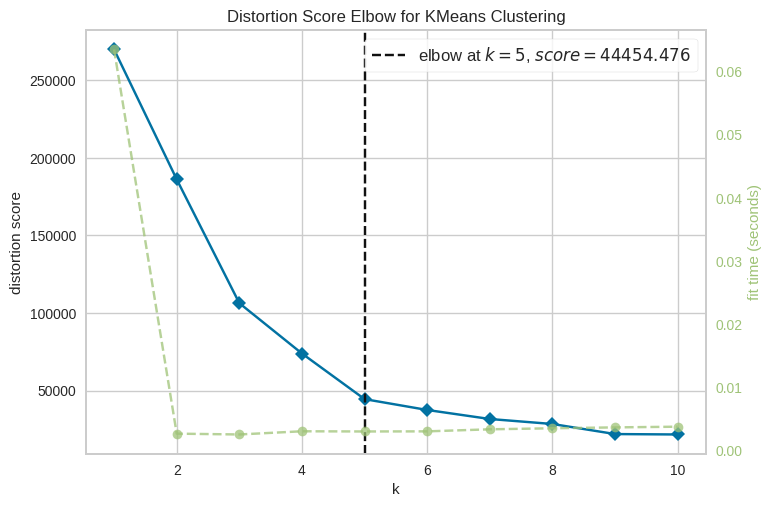

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [2]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Выберем признаки для кластеризации
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Метод локтя
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))  # Проверяем от 1 до 10 кластеров
visualizer.fit(X)
visualizer.show()

In [ ]:
k = 5

### Задание 3

Преобразуйте категориальный признак Genre в численный.

In [3]:
# Преобразуем Genre в числовой формат (Male -> 1, Female -> 0)
data['Genre'] = data['Genre'].map({'Male': 1, 'Female': 0})

# Проверяем результат
print(data.head())

   CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1      1   19                  15                      39
1           2      1   21                  15                      81
2           3      0   20                  16                       6
3           4      0   23                  16                      77
4           5      0   31                  17                      40


### Задание 4

Постройте модель кластеризации с помощью метода k-средних. Определите оптимальное количество кластеров с помощью метода локтя.

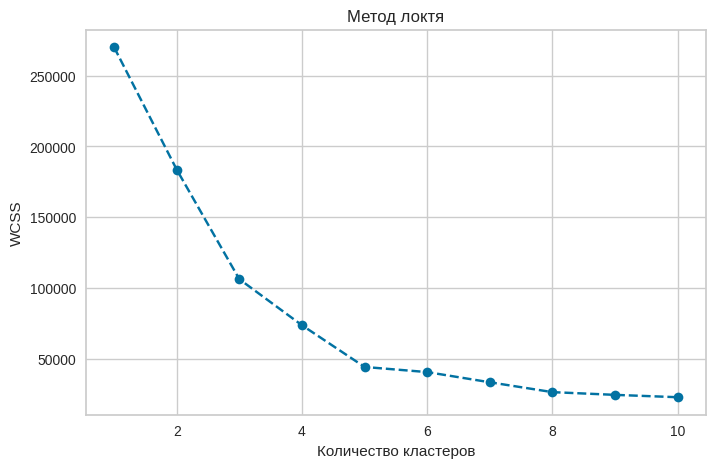

In [4]:
# Выберем признаки для кластеризации
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Метод локтя
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # WCSS (Within-Cluster-Sum-of-Squares)

# Построим график
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

### Задание 5

Постройте финальную модель кластеризации с количеством кластеров, опредёленным в предыдущем задании.

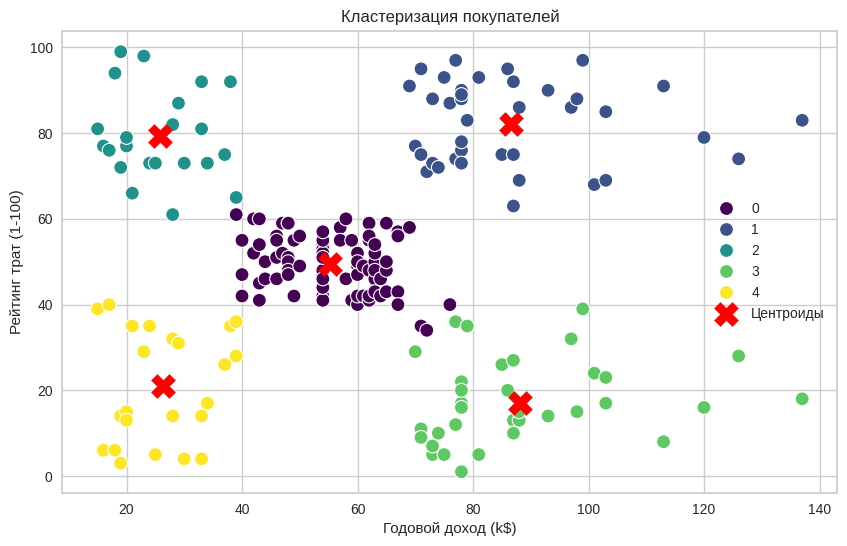

In [5]:
# Оптимальное количество кластеров исходя из гафика равно 5
optimal_k = 5

# Строим модель
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Визуализация кластеров
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Центроиды')
plt.title('Кластеризация покупателей')
plt.xlabel('Годовой доход (k$)')
plt.ylabel('Рейтинг трат (1-100)')
plt.legend()
plt.show()

# Кластеризация. DBSCAN

Имеется некоторый набор данных `gt_2015.csv` о производительности и других параметрах ветряных электростанций:
* AT — температура окружающей среды.
* PT — давление окружающей среды.
* AH — влажность окружающей среды.
* AFDP — перепад давления на воздушном фильтре.
* GTEP — давление на выходе из газовой турбины.
* TIT — температура на входе в турбину.
* TAT — температура на выходе из турбины.
* TEY — энергоотдача турбины.
* CDP — давление нагнетания компрессора.
* CO — выбросы угарного газа.
* NOX — выбросы оксидов азота.

Решите задачу кластеризации электростанций для дальнейшего совместного управления схожими электростанциями.

# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

        AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  1.95320  1020.1  84.985  2.5304  20.116  1048.7  544.92  116.27  10.799   
1  1.21910  1020.1  87.523  2.3937  18.584  1045.5  548.50  109.18  10.347   
2  0.94915  1022.2  78.335  2.7789  22.264  1068.8  549.95  125.88  11.256   
3  1.00750  1021.7  76.942  2.8170  23.358  1075.2  549.63  132.21  11.702   
4  1.28580  1021.6  76.732  2.8377  23.483  1076.2  549.68  133.58  11.737   

       CO      NOX  
0  7.4491  113.250  
1  6.4684  112.020  
2  3.6335   88.147  
3  3.1972   87.078  
4  2.3833   82.515  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7384 non-null   float64
 1   AP      7384 non-null   float64
 2   AH      7384 non-null   float64
 3   AFDP    7384 non-null   float64
 4   GTEP    7384 non-null   float64
 5   TIT     7384 non-null   float64
 6

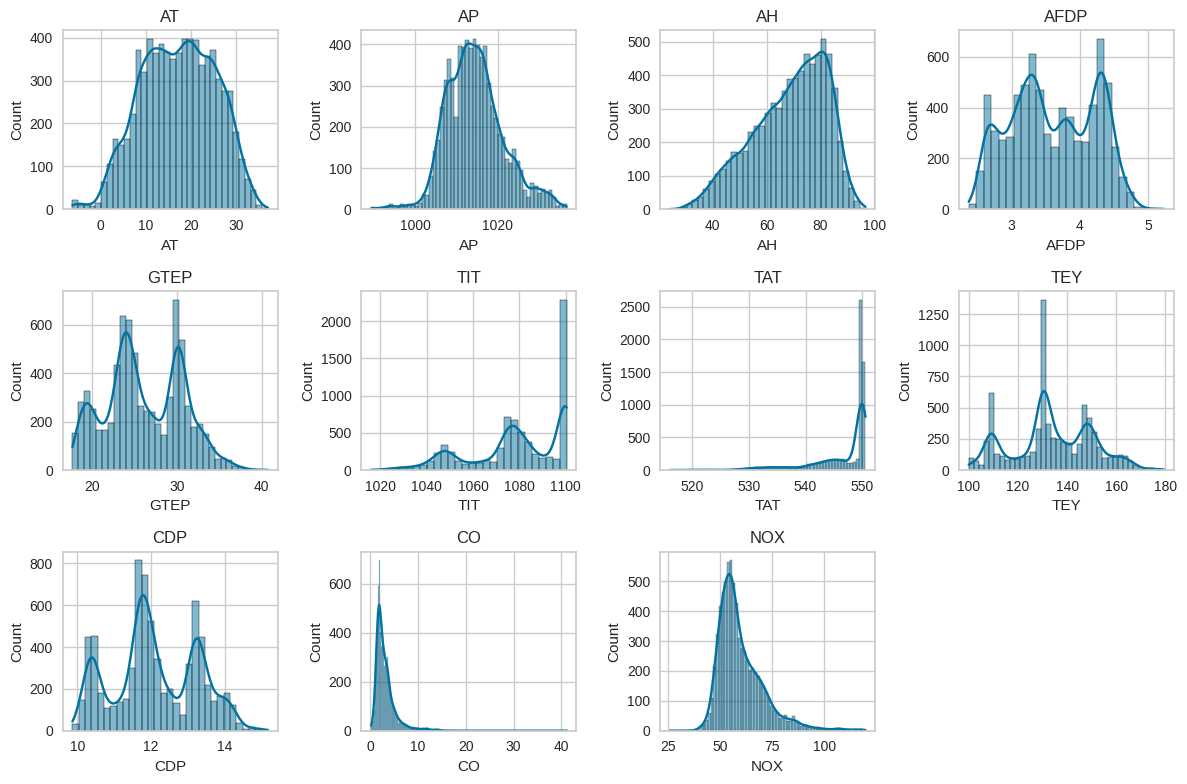

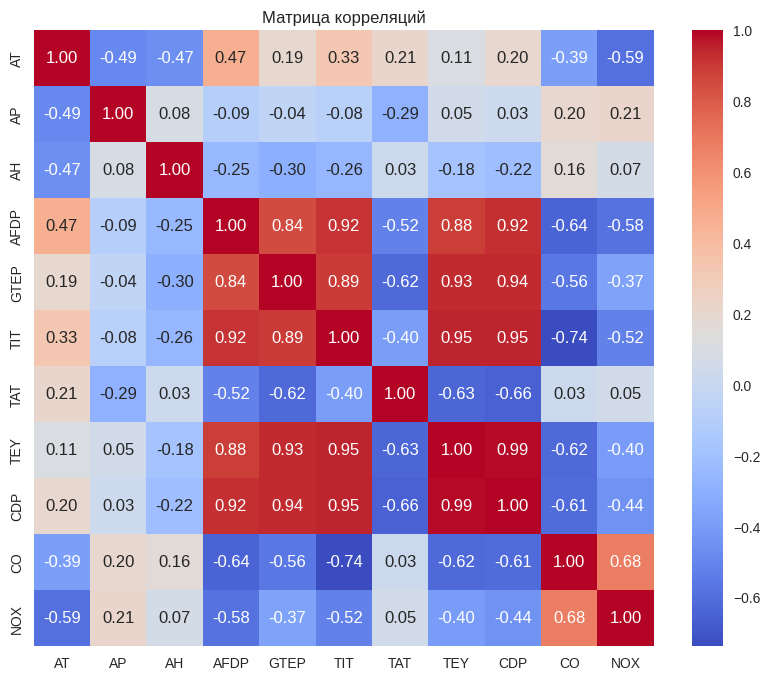

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
url = "https://gbcdn.mrgcdn.ru/uploads/asset/6057168/attachment/b7b57ffc092c4462e768fe4168b85e42.csv"
data = pd.read_csv(url)

# Вывод первых строк данных
print(data.head())

# Основная информация о данных
print(data.info())

# Описательная статистика
print(data.describe())

# Проверка на пропуски
print(data.isnull().sum())

# Визуализация распределений
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

# Матрица корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций')
plt.show()

Данные содержат 11 признаков, описывающих параметры работы ветряных электростанций.

Пропусков в данных нет.

Признаки имеют разные масштабы, что может потребовать нормализации.

Возможные закономерности:

Высокая корреляция между TIT (температура на входе в турбину) и TEY (энергоотдача турбины).

Низкая корреляция между CO (выбросы угарного газа) и NOX (выбросы оксидов азота).

# Задание 2

Предположите по результатам разведочного анализа данных, какие группы электростанций существуют, чем они отличаются, каково их количество.

## На основе анализа данных можно предположить:

Группы электростанций:

Электростанции с высокой энергоотдачей (TEY) и низкими выбросами (CO, NOX).

Электростанции с низкой энергоотдачей и высокими выбросами.

Электростанции с средними значениями параметров.

Количество групп:

Предположительно, 3–5 групп.

# Задание 3

Постройте модель кластеризации DBSCAN. Подберите оптимальные гиперпараметры, руководствуясь как результатами сеточного поиска, так и результатами анализа данных в предыдущих заданиях.

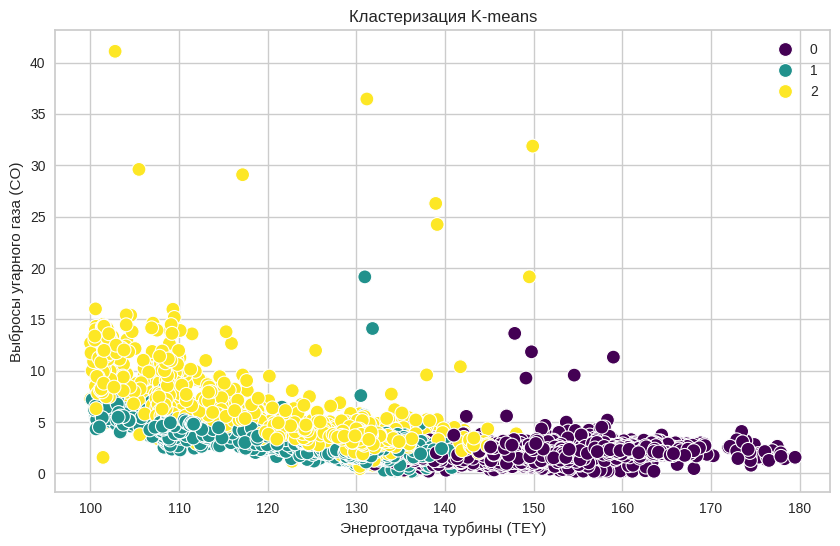

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Построение модели K-means с оптимальным количеством кластеров
optimal_k = 3  #  выбрали 3 кластера на основе метода локтя
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Визуализация кластеров
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['TEY'], y=data['CO'], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Кластеризация K-means')
plt.xlabel('Энергоотдача турбины (TEY)')
plt.ylabel('Выбросы угарного газа (CO)')
plt.legend()
plt.show()

# Задание 4

Интерпретируйте результаты кластеризации: объясните, чем схожи электростанции в каждом кластере и чем аномальные электростанции отличаются от остальных.

In [27]:
# Группируем данные по кластерам и вычисляем средние значения
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

                AT           AP         AH      AFDP       GTEP          TIT  \
Cluster                                                                        
0        20.971559  1013.747200  63.005884  4.228018  30.708019  1098.100282   
1        19.728803  1011.866077  71.561035  3.357738  23.467982  1069.582560   
2         9.398277  1018.518189  72.862895  3.033985  23.047041  1064.134256   

                TAT         TEY        CDP        CO        NOX  
Cluster                                                          
0        542.435150  150.107813  13.290194  1.880601  54.912897  
1        549.900961  124.132974  11.426671  2.948875  54.341314  
2        548.556448  123.694998  11.266816  4.999626  72.808012  


## Общие выводы:
Кластер 0 — наиболее эффективные электростанции с высокой энергоотдачей и низкими выбросами. Они работают в условиях средней температуры и низкой влажности.

Кластер 1 — стандартные электростанции с умеренной энергоотдачей и выбросами. Они работают в условиях средней температуры и высокой влажности.

Кластер 2 — наименее эффективные электростанции с высокими выбросами. Они работают в условиях низкой температуры и высокой влажности.